BY: **RIYA JOSHI**

EMAIL: riya.joshi@somaiya.edu



---


### **Basic idea behind Naïve Bayes algorithm**:

*   It is a classification algorithm based on Bayes theorem.
*   Bayes’ theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

Naive Bayes Classifier formula can be written based on Bayes theorem as:

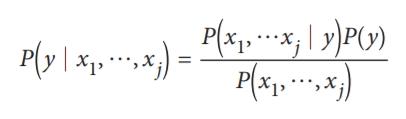

Where,
* x1, … , xj are j features that are independent of each other. y is the dependent variable.
* P(y|x1,…, xj): Posterior Probability
* P(x1, …, xj|y): Likelihood of features x1 to xj given that their class is y.
* P(y): Prior Probability
* P(x1, …, xj): Marginal Probability




### **Applications of Naïve Bayes**:
* As this algorithm is fast and efficient, you can use it to make real-time predictions.
* This algorithm is popular for multi-class predictions. You can find the probability of multiple target classes easily by using this algorithm.
* Email services (like Gmail) use this algorithm to figure out whether an email is a spam or not. This algorithm is excellent for spam filtering.
* Its assumption of feature independence, and its effectiveness in solving multi-class problems, makes it perfect for performing Sentiment Analysis.
* Collaborative Filtering and the Naive Bayes algorithm work together to build recommendation systems. These systems use data mining and machine learning to predict if the user would like a particular resource or not. 




---




In [1]:
# Importing required libraries
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('players_20.csv') #importing dataset
df.head() # displaying first five records

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-1987,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,01-07-2004,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-1985,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,10-07-2018,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,05-02-1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,03-08-2017,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,07-01-1993,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,16-07-2014,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,07-01-1991,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,01-07-2019,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [3]:
# replacing null values with 0
df = df.fillna(value= 0)

In [4]:
# Shuffling dataset ( to remove any biases in the dataset if any )
df = df.sample(frac=1)

In [5]:
# nationality , club , body_type , work_rate
# target : preferred_foot
new_df=df[['nationality' , 'club' , 'body_type' , 'work_rate' , 'preferred_foot']]
new_df.head()

,nationality,club,body_type,work_rate,preferred_foot
9557,Korea Republic,Ulsan Hyundai FC,Normal,Medium/Medium,Right
10844,Austria,TSV Hartberg,Stocky,Medium/Medium,Right
5155,Japan,Urawa Red Diamonds,Lean,High/Medium,Right
2668,Spain,Real Valladolid CF,Lean,High/Medium,Right
6141,Switzerland,FC Lugano,Lean,Medium/Medium,Left


In [6]:
# splitting dataset into 70:30 ratio

# Defining train size
train_size = int(0.7 * len(new_df))

# Splitting dataset
train_set = new_df[:train_size]
test_set = new_df[train_size:]

In [7]:
# separating train_set into X and Y
X_train=train_set.drop('preferred_foot', axis=1)
y_train=train_set['preferred_foot']

# separating test_set into X and Y
X_test=test_set.drop('preferred_foot', axis=1)
y_test=test_set['preferred_foot']

# **Naïve Bayes**

In [8]:
def fit(X,y):

  # to initialize likelihoodss, pred_priors, class_priors 

  features = list(X.columns)
  likelihoodss={}
  pred_priors={}
  class_priors = {}

  for feature in features:
    likelihoodss[feature] = {}
    pred_priors[feature] = {}

    for feat_val in np.unique(X[feature]):
      pred_priors[feature].update({feat_val: 0})

      for outcome in np.unique(y):
        likelihoodss[feature].update({feat_val+'_'+outcome:0})
        class_priors.update({outcome: 0})
      
  return [features,likelihoodss,pred_priors,class_priors]

In [9]:
def prior_probability(y):

  # Calculates prior probability

  for outcome in np.unique(y):
	  outcome_count = sum(y == outcome)
	  class_priors[outcome] = outcome_count / train_size

  return class_priors

In [10]:
def predictor_prior(X):

  # Calculates marginal probability

  for feature in features:
	  feat_vals = X[feature].value_counts().to_dict()

	  for feat_val, count in feat_vals.items():
		  pred_priors[feature][feat_val] = count/train_size

  return pred_priors

In [11]:
def Likelihood(X,y):

  # Calculates likelihood of features
  
  for feature in features:

	  for outcome in np.unique(y):
		  outcome_count = sum(y == outcome)
		  feat_likelihood = X[feature][y[y == outcome].index.values.tolist()].value_counts().to_dict()

		  for feat_val, count in feat_likelihood.items():
			  likelihoodss[feature][feat_val + '_' + outcome] = count/outcome_count

  return likelihoodss

In [17]:
def predict(X,y):

  global features,likelihoodss,pred_priors,class_priors

  # Calling required functions
  li = fit(X,y) 
  
  features = li[0]
  likelihoodss = li[1]
  pred_priors = li[2]
  class_priors = li[3]

  class_priors = prior_probability(y)
  pred_priors = predictor_prior(X)
  likelihoodss = Likelihood(X,y)

	# Calculates Posterior probability P(c|x) 

  results = []
  X = np.array(X)

  for query in X:
	  probs_outcome = {}
	  for outcome in np.unique(y):
		  prior = class_priors[outcome]
		  likelihood = 1
		  evidence = 1

		  for feat, feat_val in zip(features, query):
			  likelihood *= likelihoodss[feat][feat_val + '_' + outcome]
			  evidence *= pred_priors[feat][feat_val]

		  posterior = (likelihood * prior) / (evidence)

		  probs_outcome[outcome] = posterior

	  result = max(probs_outcome, key = lambda x: probs_outcome[x])
	  results.append(result)

  return np.array(results)

In [18]:
predict(X_train,y_train)

array(['Right', 'Right', 'Right', ..., 'Right', 'Right', 'Right'],
      dtype='<U5')

### Accuracy score

In [19]:
def accuracy_score(y_true, y_pred):

	#	score = (y_true - y_pred) / len(y_true)

	return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100 ,2)

In [20]:
print("Train Accuracy: {}".format(accuracy_score(y_train, predict(X_train,y_train))))

Train Accuracy: 76.92


In [21]:
print("Test Accuracy: {}".format(accuracy_score(y_test, predict(X_test,y_test))))

Test Accuracy: 77.22


### Confusion matrix

In [23]:
confusion_matrix(y_test,predict(X_test,y_test))

array([[ 260, 1068],
       [ 181, 3975]])